In [2]:


# System imports
import sys
import os

# Add the parent directory of 'notebooks' to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move one level up
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Class/model imports
from data.data_loader import MirDataProcessor
from utils.model_utils import get_device
from solver import Solver

# Package imports
import torch
import torch.optim as optim
import torch.nn as nn

# Select device
device = get_device()
print(f"Device is {device}")

c:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Device is cuda


In [ ]:
# Download and build useable train/test data out of the MIR Billboard dataset
#data_processer = MirDataProcessor(download=True, batch_size=64, dataset_name="guitarset")


INFO: Downloading ['annotations', 'audio_hex_debleeded', 'audio_hex_original', 'audio_mic', 'audio_mix', 'index']. Index is being stored in C:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\mirdata\datasets\indexes, and the rest of files in c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\raw
INFO: [annotations] downloading annotation.zip
37.3MB [00:02, 14.7MB/s]                              
INFO: [audio_hex_debleeded] downloading audio_hex-pickup_debleeded.zip
3.36GB [02:23, 25.2MB/s]                               
INFO: [audio_hex_original] downloading audio_hex-pickup_original.zip
2.99GB [01:59, 26.8MB/s]                               
INFO: [audio_mic] downloading audio_mono-mic.zip
626MB [00:25, 26.1MB/s]                               
INFO: [audio_mix] downloading audio_mono-pickup_mix.zip
652MB [00:25, 26.6MB/s]                               
INFO: [index] downloading guitarset_index_1.1.0.json
248kB [00:00, 385kB/s]                       

In [4]:
%load_ext autoreload

%autoreload 2

from data.data_loader import MirDataProcessor
data_processer = MirDataProcessor(download=False, batch_size=128, dataset_name="guitarset", process_sequential=True, seq_length=32796)

data_processer.process_wav_data(150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 360 tracks in the dataset.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_solo and appended data to combined CSV.
Processing datase

In [5]:
# Create data loeaders for train and test set
train_loader, test_loader, num_classes = data_processer.build_data_loaders(None, device)

print(f"Number of classes: {num_classes}")

Preparing model data...
Loading the combined CSV file...
Separating song IDs, features, and labels...
Scaling features using MinMaxScaler...
Encoding labels using LabelEncoder...
Saving the scaler to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\scaler.pkl...
Saving the label encoder to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\label_encoder.pkl...
Creating sequences of chromagram data within song boundaries...
Splitting data into training and testing sets...
Data preparation complete.
Number of classes determined: 42
Creating TensorDatasets for training and testing data...
Creating DataLoaders for training and testing datasets...
Data loaders are ready for training and testing.
Number of classes: 42


-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.7127. Validation Loss: 3.6308.
Training Accuracy: 0.0456. Validation Accuracy: 0.0948.
-----------------------------------
Epoch 2
-----------------------------------


c:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\torch\optim\lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.6470. Validation Loss: 3.5733.
Training Accuracy: 0.0534. Validation Accuracy: 0.0163.
-----------------------------------
Epoch 3
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.5667. Validation Loss: 3.5324.
Training Accuracy: 0.0677. Validation Accuracy: 0.0163.
-----------------------------------
Epoch 4
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.5061. Validation Loss: 3.5044.
Training Accuracy: 0.0733. Validation Accuracy: 0.0163.
-----------------------------------
Epoch 5
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.4583. Validation Loss: 3.4897.
Training Accuracy: 0.0804. Validation Accuracy: 0.0196.
-----------------------------------
Epoch 6
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.4266. Validation Loss: 3.4779.
Training Accuracy: 0.0899. Validation Accuracy: 0.0261.
-----------------------------------
Epoch 7
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.4001. Validation Loss: 3.4661.
Training Accuracy: 0.0930. Validation Accuracy: 0.0327.
-----------------------------------
Epoch 8
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.3740. Validation Loss: 3.4407.
Training Accuracy: 0.0944. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 9
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.3431. Validation Loss: 3.4417.
Training Accuracy: 0.0971. Validation Accuracy: 0.0490.
-----------------------------------
Epoch 10
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.3284. Validation Loss: 3.4413.
Training Accuracy: 0.0966. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 11
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.3187. Validation Loss: 3.4350.
Training Accuracy: 0.0999. Validation Accuracy: 0.0392.
-----------------------------------
Epoch 12
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.3042. Validation Loss: 3.4333.
Training Accuracy: 0.1116. Validation Accuracy: 0.0392.
-----------------------------------
Epoch 13
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.2957. Validation Loss: 3.4323.
Training Accuracy: 0.1135. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 14
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.2839. Validation Loss: 3.4339.
Training Accuracy: 0.1216. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 15
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.2673. Validation Loss: 3.4383.
Training Accuracy: 0.1317. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 16
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.2446. Validation Loss: 3.4275.
Training Accuracy: 0.1538. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 17
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.2187. Validation Loss: 3.4170.
Training Accuracy: 0.1620. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 18
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.1865. Validation Loss: 3.4323.
Training Accuracy: 0.1796. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 19
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.1470. Validation Loss: 3.4164.
Training Accuracy: 0.2111. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 20
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.1107. Validation Loss: 3.3954.
Training Accuracy: 0.2323. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 21
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.0684. Validation Loss: 3.3876.
Training Accuracy: 0.2521. Validation Accuracy: 0.0425.
-----------------------------------
Epoch 22
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.0138. Validation Loss: 3.4463.
Training Accuracy: 0.2713. Validation Accuracy: 0.0458.
-----------------------------------
Epoch 23
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.0523. Validation Loss: 3.3972.
Training Accuracy: 0.2540. Validation Accuracy: 0.0654.
-----------------------------------
Epoch 24
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 3.0044. Validation Loss: 3.4552.
Training Accuracy: 0.2564. Validation Accuracy: 0.0490.
-----------------------------------
Epoch 25
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 2.9573. Validation Loss: 3.4448.
Training Accuracy: 0.2762. Validation Accuracy: 0.0490.
-----------------------------------
Epoch 26
-----------------------------------


Training:   0%|          | 0/46 [00:00<?, ?it/s]

Training Loss: 2.9182. Validation Loss: 3.4329.
Training Accuracy: 0.2850. Validation Accuracy: 0.0425.
EARLY STOP E:26 L:3.4329


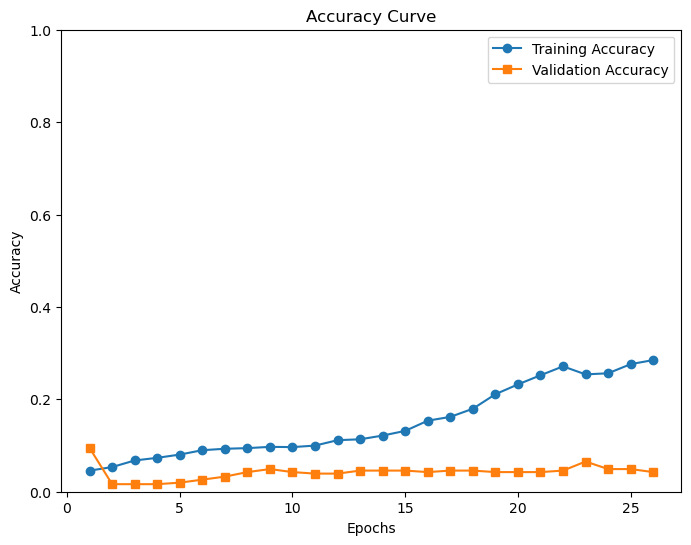

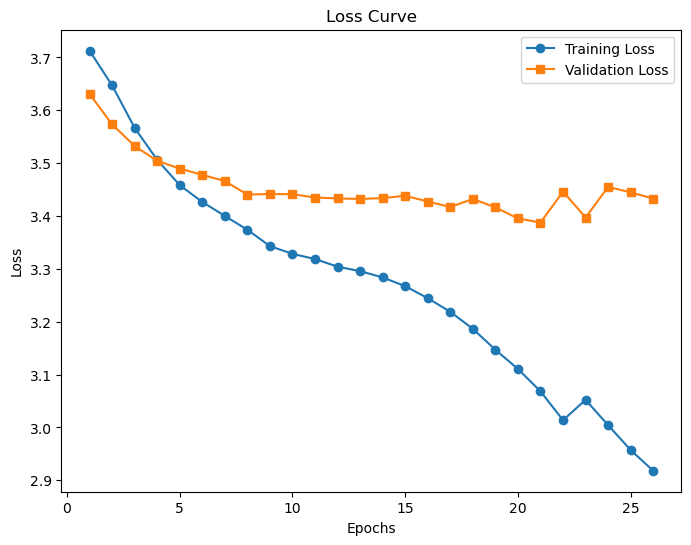

1036.600022315979

In [6]:
from models.FourierS2S import FourierS2S

model = FourierS2S(4096, 256, 2048, 64, 256, num_classes, 32796, device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, 20)


# Initialize Solver for CRNNModel
fourierS2S_solver = Solver(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    train_dataloader=train_loader,
    valid_dataloader=test_loader,
    batch_size=128,
    epochs=40,
    device=device,
    early_stop_epochs=5,
    warmup_epochs=2,
    optuna_prune=False
)
fourierS2S_solver.train_and_evaluate(plot_results=True)